In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [947]:
data = pd.read_csv("https://datahub.io/machine-learning/iris/r/iris.csv")

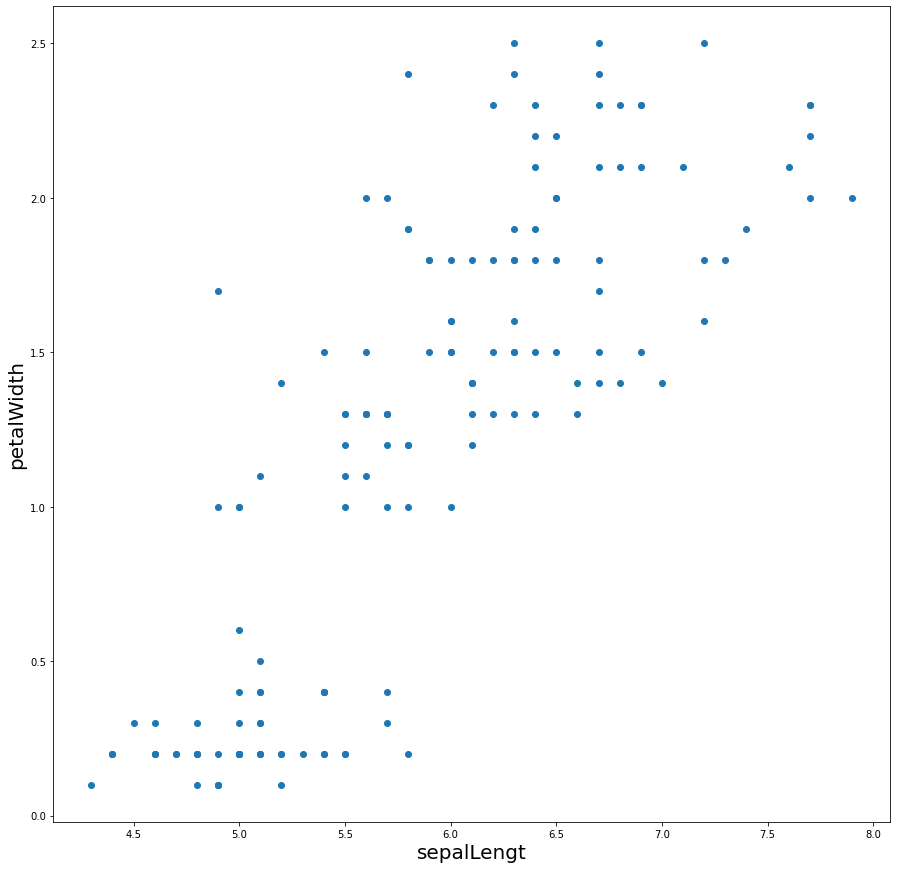

In [948]:
fig, ax = plt.subplots()
ax.scatter(data["sepallength"], data["petalwidth"])
fig.set_figwidth(15)
fig.set_figheight(15)
ax.set_xlabel('sepalLengt', fontsize = 20)
ax.set_ylabel('petalWidth', fontsize = 20)
plt.show()

Метод заключается в следующем:

Мы говорим методу k-means, на сколько кластеров мы хотим поделить наши данные.
Далее случайно выбираем позиции центроидов кластеров.
Далее нам надо вывести центроиды на позиции, чтобы их координаты приняли значения равные средним арифметическим по какждому признаку.


In [949]:
def generate_centroids(n: int, data, *args):
    """ 
    Функция для генерации центроидов. Принимает на вход n - количество желамых
    центроидов, и набор series, для которого эти центроиды будут сгенерированы.
    Вернет матрицу с координатами центроидов в пространстве.
    """
    centroids = np.array([])
    for i in range(n):
        centroids = np.append(
            centroids,
            np.array(
                [random.randrange(min(data[column]) * 10, max(data[column]) * 10) / 10 for column in args]
            )
        )
    return centroids.reshape(n, len(args))


In [950]:
def generate_colors(n: int):
    colors = [None for i in range(n)]
    for i in range(n):
        colors[i] = '#%06X' % random.randint(0, 0xFFFFFF)
    return colors


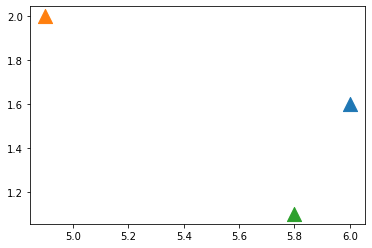

In [951]:
def split_by_clasters(n: int, data, *args):
    centroids = generate_centroids(n, data, *args)
    fig, ax = plt.subplots()
    for i in range(n):
        ax.scatter(centroids[i, 0], centroids[i, 1], marker ="^", s = 200)
    plt.show()

    isChanged = True
    
    while isChanged:
        
        isChanged = False
        data["distance"] = float("inf")
        
        for i in range(n):
            for index, row in data.iterrows():
                squared_distance = sum([(data.loc[index, args[j]] - centroids[i, j]) ** 2 for j in range(len(args))])
                distance = squared_distance**0.5
                if distance < data.loc[index, "distance"]:
                    data.loc[index, "distance"] = distance
                    data.loc[index, "claster"] = i
        for i in data.claster.unique():
            for j in range(len(args)):
                if centroids[int(i), j] != data.loc[data["claster"]==i][args[j]].mean():
                    isChanged = True
                    centroids[int(i), j] = data.loc[data["claster"]==i][args[j]].mean()

    return centroids
        
centroids = split_by_clasters(3, data, "sepallength", "petalwidth")







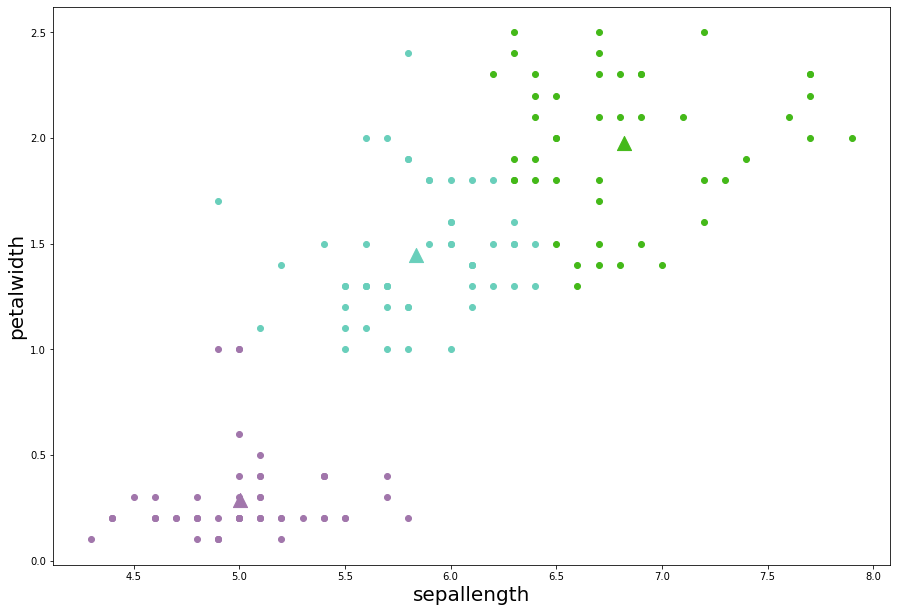

In [954]:
def plot(data, centroids, *args):
    n = len(centroids)
    colors = generate_colors(n)
    fig, ax = plt.subplots()
    for i in range(n):
        ax.scatter(data.loc[data["claster"] == i, args[0]], data.loc[data["claster"] == i, args[1]], color = colors[i])
        ax.scatter(centroids[i, 0], centroids[i, 1], marker ="^", s = 200, color = colors[i])

    fig.set_figwidth(15)
    fig.set_figheight(15)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(args[0], fontsize = 20)
    ax.set_ylabel(args[1], fontsize = 20)
    plt.show()

plot(data, centroids, "sepallength", "petalwidth")

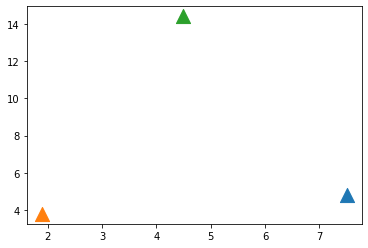

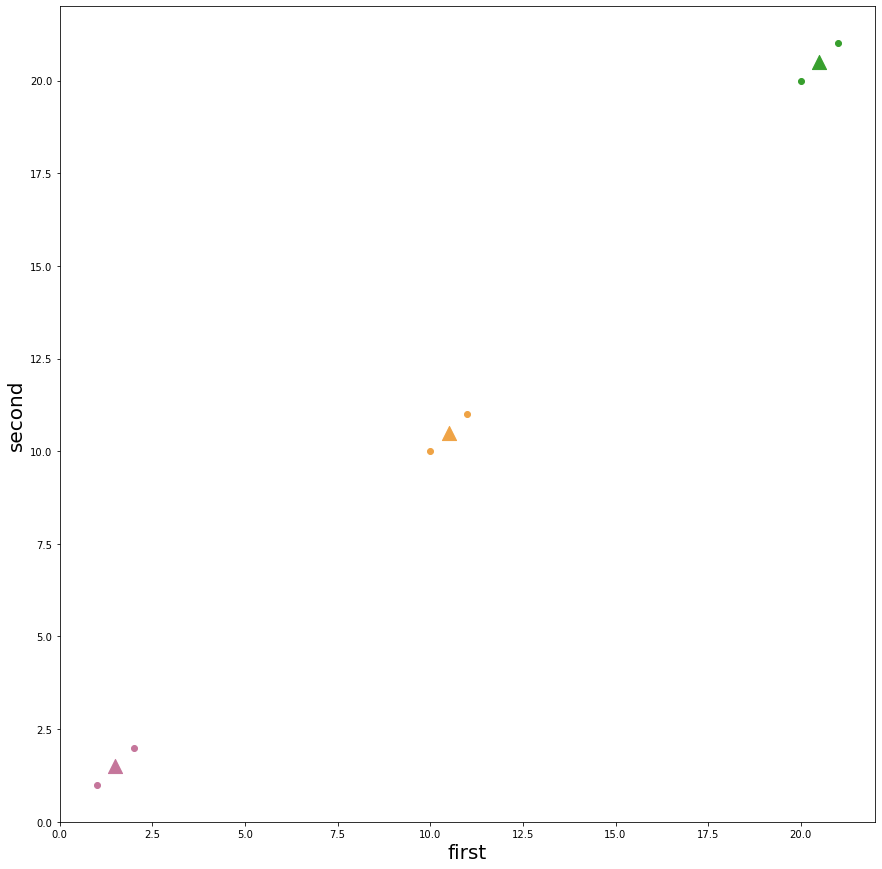

In [956]:
data = {"first": [1, 2, 10, 11, 20, 21], "second": [1, 2, 10, 11, 20, 21]}
data = pd.DataFrame(data)

plot(data, split_by_clasters(3, data, "first", "second"), "first", "second")